# 📌 Week 3 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA 모델 & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 정상성이 중요한 이유를 말씀해주시고, ARIMA 모델에서는 데이터의 비정상성을 어떻게 처리하는지 설명해주세요.

**A1**

시계열 데이터의 정상성은 평균, 분산 등 통계적 특성이 시간에 따라 일정하여 데이터의 패턴을 파악하고 미래를 예측하기 위한 핵심 전제입니다. 대부분의 시계열 모델은 이 정상성을 가정하므로, 비정상 데이터를 그대로 사용하면 모델의 신뢰도가 떨어집니다.

ARIMA 모델은 차분(Differencing)이라는 기법으로 이 문제를 해결합니다. 차분은 현재 데이터에서 이전 데이터를 빼주어 시간에 따른 추세나 계절성을 제거하고, 비정상 데이터를 안정적인 정상 데이터로 변환합니다. 이렇게 정상화된 데이터를 바탕으로 ARIMA는 패턴을 학습하여 안정적인 예측을 수행할 수 있습니다.

**Q2**

- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요. 또한, 파라미터 p와 q 결정하는 방법에 대해 상세하게 설명해주세요.

**A2**

AR(p) 모델은 현재 값이 과거의 관측값들에 의해 결정된다고 보는 반면, MA(q) 모델은 현재 값이 과거의 예측 오차(shock)들에 의해 결정된다고 봅니다.

파라미터 p와 q는 시계열 데이터의 ACF(자기상관함수)와 PACF(편자기상관함수) 그래프를 보고 결정합니다. AR(p) 모델은 PACF가 p 시차 이후 급격히 감소하고, MA(q) 모델은 ACF가 q 시차 이후 급격히 감소하는 특징을 가집니다.



---



## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [1]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("./Time_Series_hw_data_test.csv")
df_eval=pd.read_csv("./Time_Series_hw_data_train.csv")

# 데이터 확인
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [2]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


### 정상성 확인

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(np.float64(-1.096474275875619), np.float64(0.7164758731775932))

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 서술해주세요,<br><br>




**A1**<br><br>
답:ADF 검정 결과, p-value가 유의수준(일반적으로 0.05)보다 크면 귀무가설을 기각하지 못하므로 데이터는 단위근을 가져 비정상성을 띤다고 판단합니다.

이러한 비정상성은 데이터의 평균과 분산이 시간에 따라 변한다는 의미입니다. 이를 해결하기 위해 현재 시점의 데이터에서 이전 시점의 데이터를 빼주는 차분(differencing)을 적용하여 시계열의 추세를 제거하고 데이터를 안정화시킬 수 있습니다.

In [4]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(np.float64(-12.035797595562196), np.float64(2.8053213689778235e-22))

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 얼마로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>

p: 1   
<br>
이유: ACF 플롯을 보면, lag 1에서 유의미한 양의 상관관계를 보인 후 급격하게 감소하여 신뢰 구간 안으로 들어갑니다. 이렇게 첫 번째 lag 이후 값이 절단되는 패턴은 MA(1) 모델의 특징입니다. 따라서 q는 1로 설정하는 것이 적절합니다.  
<br><br>

q: 1
<br>
이유:PACF 플롯 역시, lag 1에서 유의미한 양의 상관관계를 보인 후 급격하게 감소하여 신뢰 구간 안으로 들어갑니다. 이 패턴은 AR(1) 모델의 특징이므로, p는 1로 설정하는 것이 적절합니다.

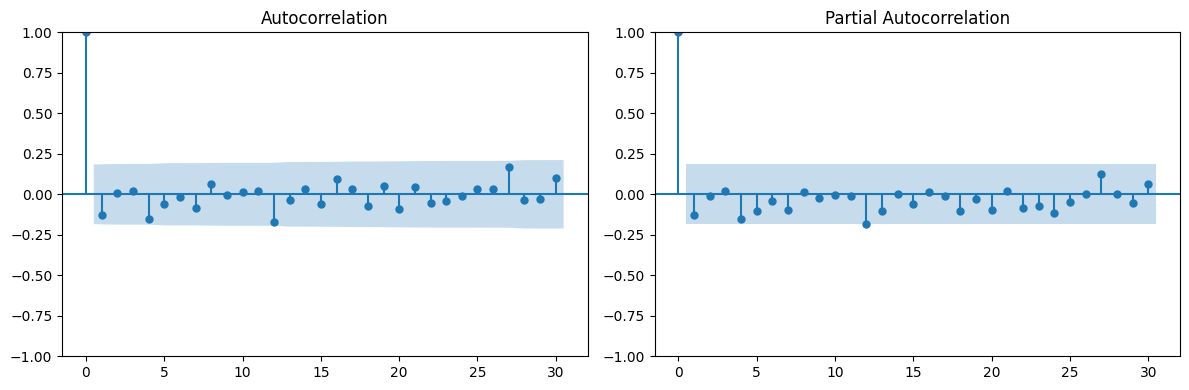

In [5]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


In [6]:
# 변수 선언

p="1"
q="1"

### ARIMA 학습

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


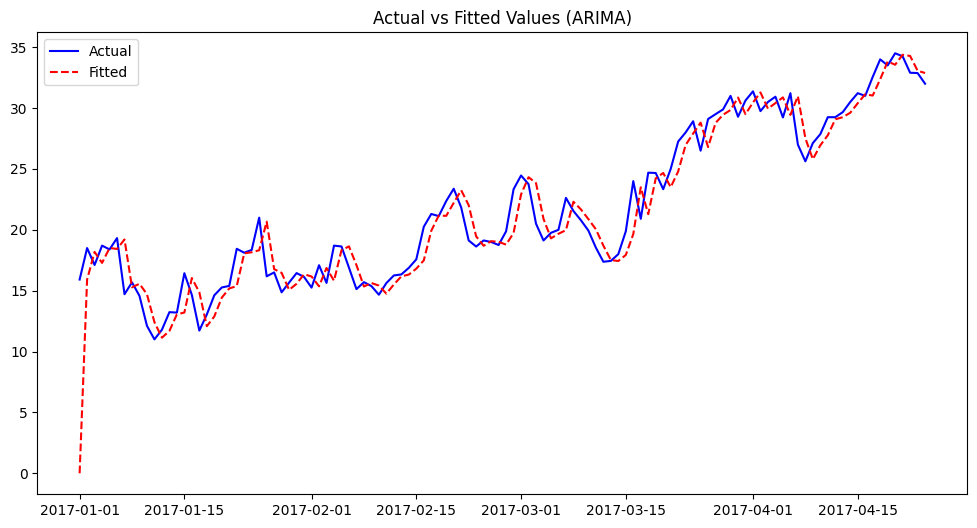

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(int(p), 1, int(q)))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

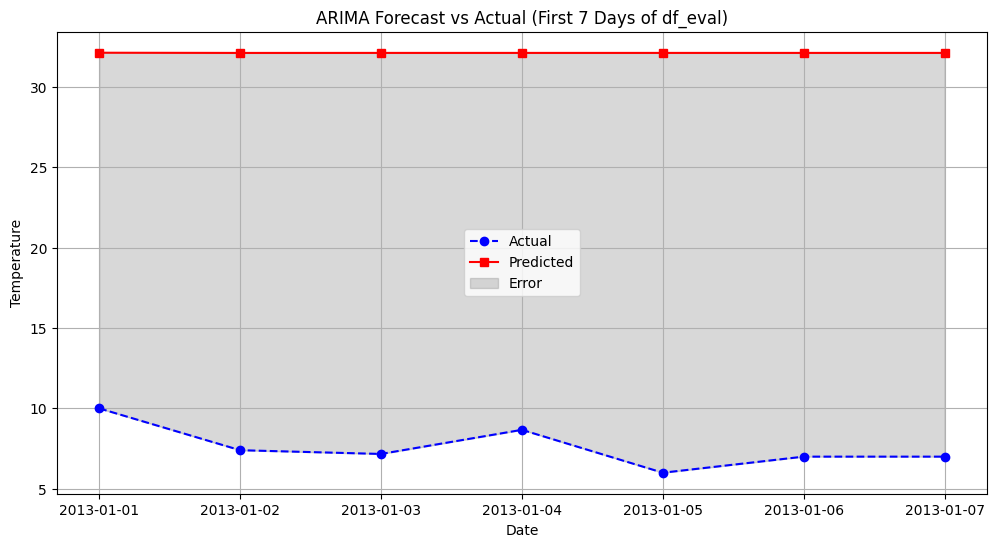

In [8]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [9]:
!pip install pmdarima

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

warnings.filterwarnings("ignore")

data = df["meantemp"]

# 후보 범위
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

best_aic = np.inf
best_order = None
best_model = None

print("Searching for optimal (p,d,q)...")

for p,d,q in itertools.product(p_range, d_range, q_range):
    try:
        model = ARIMA(data, order=(p,d,q))
        fit = model.fit()
        if fit.aic < best_aic:
            best_aic = fit.aic
            best_order = (p,d,q)
            best_model = fit
        print(f"Tested ARIMA({p},{d},{q}) - AIC: {fit.aic}")
    except:
        continue

print(f"\nOptimal (p,d,q): {best_order}, AIC: {best_aic}")

# 최적 모델의 fitted 값 df에 추가
df["fitted"] = best_model.fittedvalues


Searching for optimal (p,d,q)...
Tested ARIMA(0,0,0) - AIC: 748.3226195196617
Tested ARIMA(0,0,1) - AIC: 635.9325089858683
Tested ARIMA(0,0,2) - AIC: 580.2378363179264
Tested ARIMA(0,0,3) - AIC: 538.7808571905755
Tested ARIMA(0,0,4) - AIC: 514.7350028056633
Tested ARIMA(0,0,5) - AIC: 505.9285772321729
Tested ARIMA(0,1,0) - AIC: 441.2600773080422
Tested ARIMA(0,1,1) - AIC: 441.5878423264652
Tested ARIMA(0,1,2) - AIC: 443.5571765699425
Tested ARIMA(0,1,3) - AIC: 445.5332738305505
Tested ARIMA(0,1,4) - AIC: 444.7211969194537
Tested ARIMA(0,1,5) - AIC: 446.39750169614865
Tested ARIMA(0,2,0) - AIC: 527.65902993578
Tested ARIMA(0,2,1) - AIC: 444.29855398875037
Tested ARIMA(0,2,2) - AIC: 444.6668362218131
Tested ARIMA(0,2,3) - AIC: 446.63803629809485
Tested ARIMA(0,2,4) - AIC: 448.61247085667003
Tested ARIMA(0,2,5) - AIC: 447.50639062582684
Tested ARIMA(1,0,0) - AIC: 450.3976268317646
Tested ARIMA(1,0,1) - AIC: 451.14835196666
Tested ARIMA(1,0,2) - AIC: 453.0153772643007
Tested ARIMA(1,0,3) -

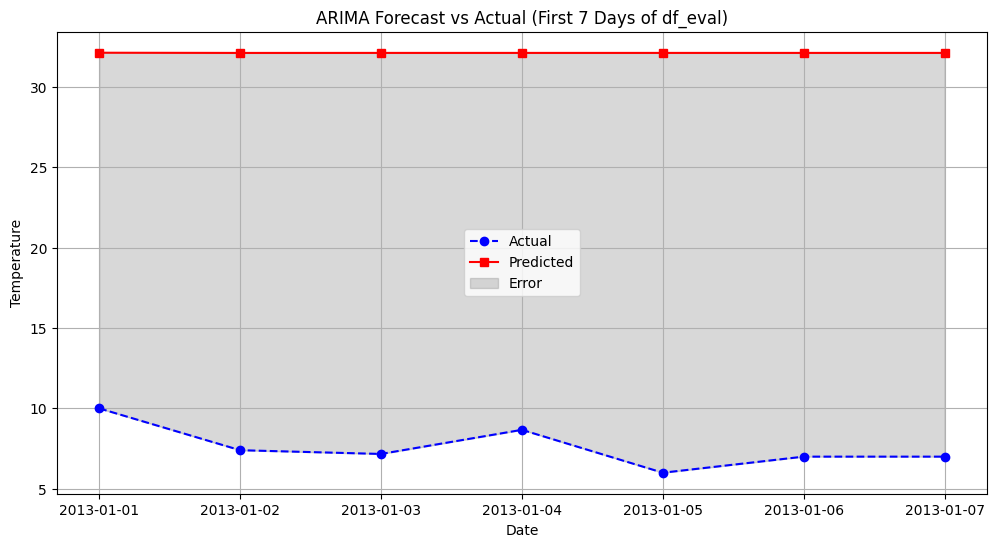

In [13]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()



---



## 💻 실습2 Dlinear

In [14]:
import pandas as pd

# 데이터 로드
train_df = pd.read_csv('./Time_Series_hw_data_test.csv')
test_df = pd.read_csv('./Time_Series_hw_data_train.csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i+seq_len]) # 빈칸을 채워주세요
        y.append(data[i+seq_len:i+seq_len+pred_len])  # 빈칸을 채워주세요
    return np.array(X), np.array(y)


seq_len = 30 # 빈칸을 채워주세요(예측을 위해 사용할 time step 수)
pred_len = 7 # 빈칸을 채워주세요(실제 예측할 time step 수)
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

**A4**<br><br>
Kernel:  25
<br>
learning rate: 0.001
<br>
individual:  False
<br>
epoch: 20
<br><br>
정확도가 더 높은 모델: Dlinear

In [42]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': False,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 25
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 20 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/20, Loss: 336314.4625
Epoch 2/20, Loss: 260017.7000
Epoch 3/20, Loss: 196408.6437
Epoch 4/20, Loss: 145332.3125
Epoch 5/20, Loss: 105881.1609
Epoch 6/20, Loss: 76375.6172
Epoch 7/20, Loss: 54830.2242
Epoch 8/20, Loss: 39281.2547
Epoch 9/20, Loss: 28076.0559
Epoch 10/20, Loss: 20013.0945
Epoch 11/20, Loss: 14183.1525
Epoch 12/20, Loss: 9956.4254
Epoch 13/20, Loss: 6904.4452
Epoch 14/20, Loss: 4709.9832
Epoch 15/20, Loss: 3152.6711
Epoch 16/20, Loss: 2073.0683
Epoch 17/20, Loss: 1345.4093
Epoch 18/20, Loss: 866.3787
Epoch 19/20, Loss: 559.2651
Epoch 20/20, Loss: 365.5606


평균 에러: -22.44002914428711


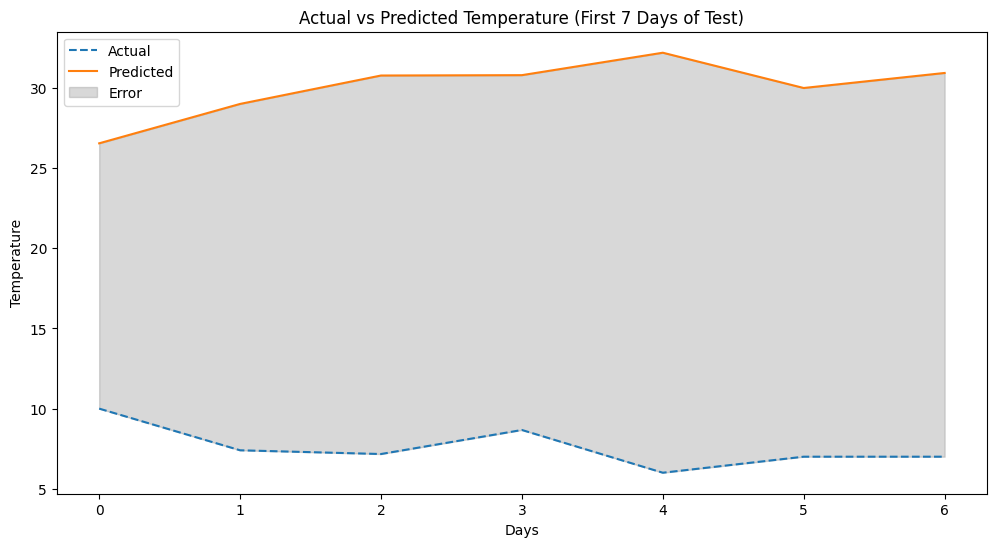

In [43]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()